In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("us-counties.csv")

In [3]:
data = pd.DataFrame(data)
data.head()

,date,county,state,fips,cases,deaths
0,1/21/2020,Snohomish,Washington,53061.0,1,0
1,1/22/2020,Snohomish,Washington,53061.0,1,0
2,1/23/2020,Snohomish,Washington,53061.0,1,0
3,1/24/2020,Cook,Illinois,17031.0,1,0
4,1/24/2020,Snohomish,Washington,53061.0,1,0


In [16]:
#Start with January datasets
data['date'] = pd.to_datetime(data['date'])

start_date = '1/21/2020'
end_date = '1/31/2020'

january_cases = (data['date'] >= start_date) & (data['date'] <= end_date)
january_cases_df = data.loc[january_cases]
january_cases_df = pd.DataFrame(january_cases_df, columns = ['date', 'county', 'state', 'fips', 'cases', 'deaths'])

january_cases_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [22]:
#Group by States and then County

#delete fips
del january_cases_df['fips']

january_cases = january_cases_df.groupby(['state', 'county']).sum()

january_cases

cases  deaths
state      county                    
Arizona    Maricopa         6       0
California Los Angeles      6       0
           Orange           7       0
           Santa Clara      1       0
Illinois   Cook            10       0
Washington Snohomish       11       0

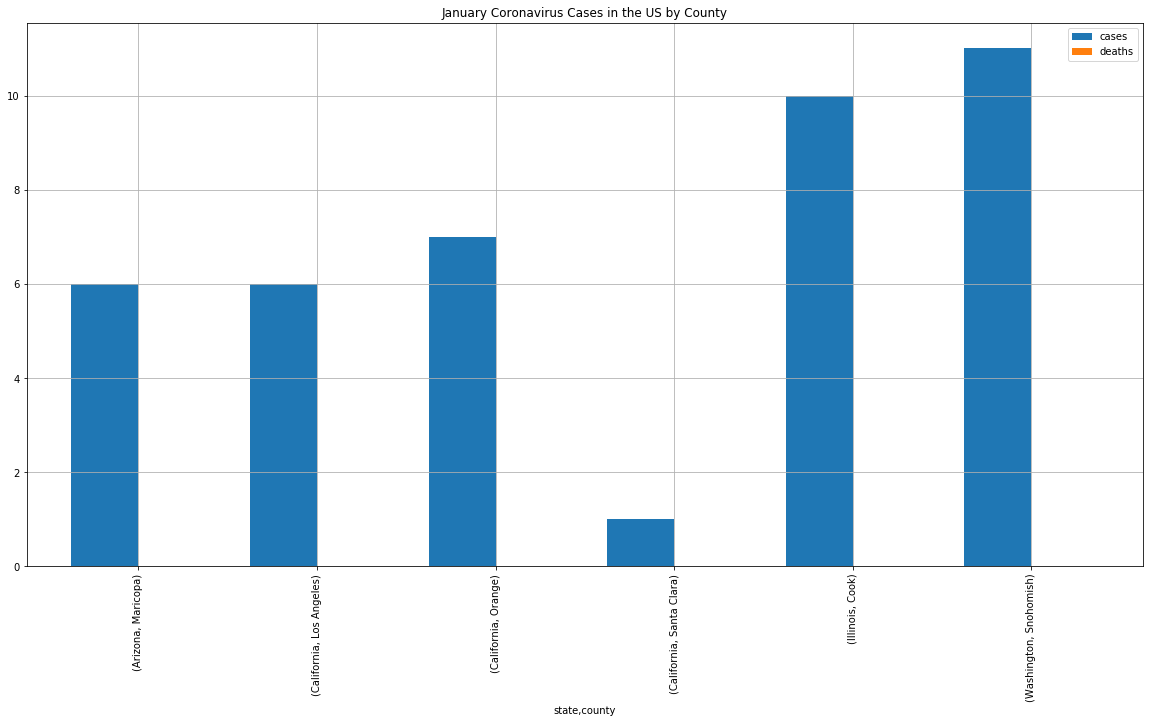

In [27]:
#Graph the cases in January only
january_cases.plot.bar(figsize = (20,10), width=0.75)

plt.title("January Coronavirus Cases in the US by County")
plt.grid()